## Pandas基础习题


In [4]:
import pandas as pd

### Step 1. 从data目录下加载数据文件chipotle.tsv. 导入数据集，读取数据并存为一个名叫chipo的dataframe，显示前20行数据

In [126]:
#your code
chipo = pd.read_csv('data/chipotle.tsv',sep='\t')
chipo.head(20)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step2. 显示出全部的列名称,并显示数据集的索引

In [69]:
#全部的列名称
#your code
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [76]:
#数据集的索引
#your code
print(chipo.index)


RangeIndex(start=0, stop=4622, step=1)


### Step3. 订单数最多的商品是什么？（查看前五行）

In [116]:
#your code
items = chipo.groupby(by=['item_name']).count().sort_values('order_id',ascending = False)
items['order_id'].nlargest(5)


item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: order_id, dtype: int64

### Step4. 在该数据集对应的时期内，一共有多少订单？

In [81]:
#your code
total = chipo['order_id'].nunique()
print(total)


1834


### Step5. 将 item_price转成float类型, 新字段名为price

In [130]:
#your code
df['price'] = chipo['item_price'].str.replace('$','').astype(float)
chipo = chipo.drop('item_price',axis=1)
chipo['price'] = df['price']
chipo


,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Step6.在该数据集对应的时期内，总收入是多少?

In [89]:
#your code
df['price'] = chipo['item_price'].str.replace('$','').astype(float)
res = (df['price']*chipo['quantity']).sum()
print(res)

39237.02


### Step7.所有订单(order)的平均总价是多少？

In [91]:
#your code
df['price'] = chipo['item_price'].str.replace('$','').astype(float)
w = (df['price']*chipo['quantity']).sum()
orders = chipo['order_id'].nunique()
res = w/orders
print(f"{res:.2f}")

21.39


### Step8.一共有多少种不同的商品被售出？

In [101]:
#your code
ans = chipo['item_name'].nunique()
print(ans)


50


### Step9.将数据集中的列 quantity, item_name,和price单独存为一个名叫item的DataFrame，查看前五行数据

In [132]:
#your code
item = chipo[['quantity','item_name','price']]
item.head(5)


,quantity,item_name,price
0,1,Chips and Fresh Tomato Salsa,2.39
1,1,Izze,3.39
2,1,Nantucket Nectar,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,Chicken Bowl,16.98


### Step10.对item按照先price再item_name进行排序（查看前30行）

In [137]:
#your code
item.sort_values(['price','item_name']).head(30)



,quantity,item_name,price
34,1,Bottled Water,1.09
87,1,Bottled Water,1.09
318,1,Bottled Water,1.09
701,1,Bottled Water,1.09
780,1,Bottled Water,1.09
943,1,Bottled Water,1.09
1140,1,Bottled Water,1.09
2410,1,Bottled Water,1.09
2545,1,Bottled Water,1.09
2754,1,Bottled Water,1.09


### Step11.找到price超过25的数据

In [148]:
#your code
ans = chipo[chipo['price']>25]
ans

,order_id,quantity,item_name,choice_description,price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
1255,511,3,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",27.75
1514,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25
3334,1336,3,Steak Bowl,"[Tomatillo Green Chili (Medium), [Rice, Black ...",26.07
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75


### Step 12.  加载58同城房源销售数据.

In [153]:
#your code
house58 = pd.read_excel('./data/58.xlsx')
house58


,price,housearea,houseoriented,shishu,housefloor,housetype
0,50000,100,南,2,3,公寓
1,73513,123,南北,3,4,连排别墅
2,23434,86,北,3,5,公寓
3,45623,45,北,2,8,独立屋
4,18573,65,南,2,7,连排别墅
5,23567,74,南,2,1,公寓
6,85764,89,北,3,9,独立屋
7,63547,56,北,2,8,连排别墅
8,85638,76,南,3,12,公寓
9,23452,75,南北,3,2,独立屋


### Step13. 根据58同城房源销售数据，统计不同房屋类型（housetype）的数量。

In [156]:
#your code
ht = house58['housetype'].value_counts().sort_values(ascending=False)
ht.name = 'housetype'
ht.index.name = None 
ht


公寓      10
连排别墅     5
独立屋      5
Name: housetype, dtype: int64

### Step 14. 根据58同城房源销售数据，统计房屋面积（housearea）分别为0-50，51-70，71-90，以及超过90的房源数量。

In [159]:
#your code
bins = [0,50,70,90,99999999]
labels = ['0-50','51-70','71-90','>90']
house58['housecnt'] = pd.cut(house58['housearea'],bins=bins,labels=labels,right = False)     
Result = house58.groupby(by=['housecnt'], observed=True)['housearea'].agg(['count'])
Result.index.name=None
print(Result)



       count
0-50       2
51-70      6
71-90      9
>90        3


### Step 15.将14题的结果用5英寸*5英寸饼图表示

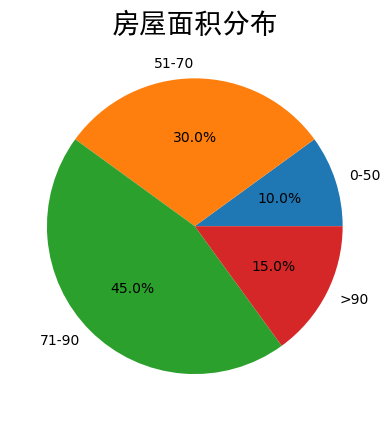

In [162]:
import matplotlib.pyplot as plt
labels = ['0-50', '51-70', '71-90', '>90']
sizes = [10, 30, 45, 15]
explode = [0.00, 0, 0, 0]  
plt.pie(sizes, explode=explode, labels=labels,
        labeldistance=1.1, autopct='%1.1f%%')
plt.title('房屋面积分布', fontname='SimHei',fontsize = 20)
plt.show()

### Step 16.将13题的结果分别用水平柱状图和垂直柱状图表示在一张图内

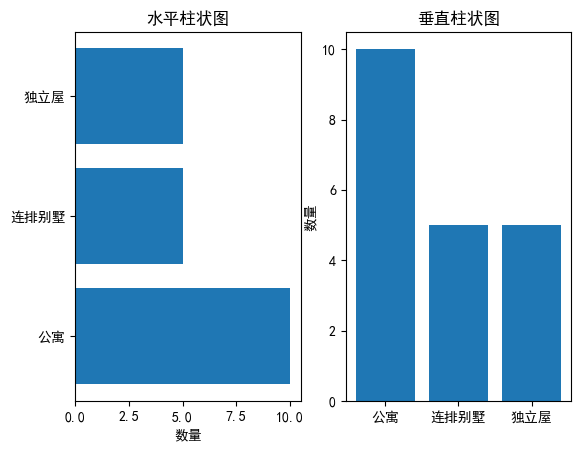

In [165]:
#your code

import matplotlib.pyplot as plt
import numpy as np
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
x = ht.values
label = ht.index  

plt.subplot(121)
plt.barh(label, x)
plt.xlabel('数量')
plt.title('水平柱状图')

plt.subplot(122)
plt.bar(label, x)
plt.ylabel('数量')
plt.title('垂直柱状图')

plt.show()
